In [1]:
from google.colab import files
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
uploaded = files.upload()

MessageError: ignored

<class 'numpy.ndarray'>
(321, 481, 3)


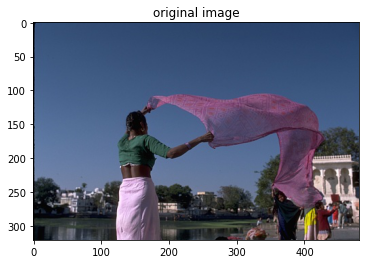

In [ ]:
I = mpimg.imread("80085.jpg")
print(type(I))
print(I.shape)
plt.title('original image')
plt.imshow(I)

(321, 481)


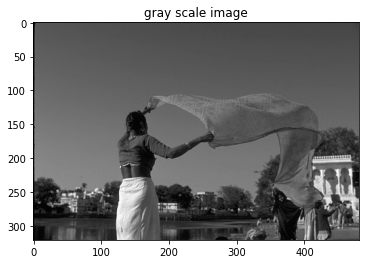

In [ ]:
[rows,cols,pages] = np.shape(I)
# Split image into seperate r g b channels
r=I[:,:,0]
g=I[:,:,1]
b=I[:,:,2]

# Grey image
Gray_I=r/3+g/3+b/3
plt.title('gray scale image')
plt.imshow(Gray_I, cmap ='gray')
print(Gray_I.shape)

In [ ]:
def gaussian_kernel(size, sigma):
    
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    N = 1 / (2.0 * np.pi * sigma**2)
    G =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * N
    
    return G

[[0.04875119 0.06291796 0.04875119]
 [0.06291796 0.0812015  0.06291796]
 [0.04875119 0.06291796 0.04875119]]


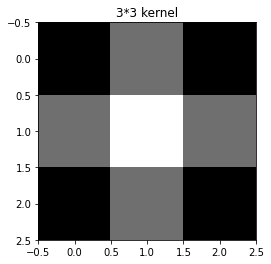

In [ ]:
size = 3
sigma = 1.4
G_kernel = gaussian_kernel(size, sigma)
print(G_kernel)
plt.title('3*3 kernel')
plt.imshow(G_kernel, cmap = 'gray')

In [ ]:
def convolution2d(image, kernel, Pd=0, S=1):
    kernel = np.flipud(np.fliplr(kernel))
    Xk = kernel.shape[0]
    Yk = kernel.shape[1]
    Xi = image.shape[0]
    Yi = image.shape[1]
    
     # Shape of Output Convolution
    Xo = int(((Xi - Xk + 2 * Pd) / S) + 1)
    Yo = int(((Yi - Yk + 2 * Pd) / S) + 1)
    out = np.zeros((Xo, Yo))
    
    if Pd != 0:
        Ip = np.zeros((image.shape[0] + Pd*2, image.shape[1] + Pd*2))   # Ip = padded image
        Ip[int(Pd):int(-1 * Pd), int(Pd):int(-1 * Pd)] = image
        print(Ip)
    else:
        Ip = image
        
    for y in range(Yi):
        # Exit Convolution
        if y > Yi - Yk:
            break

        if y % S == 0:
            for x in range(Xi):
                # Go to next row once kernel is out of bounds
                if x > Xi - Xk:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % S == 0:
                        out[x, y] = (kernel * Ip[x: x + Xk, y: y + Yk]).sum()
                except:
                    break
                    
    return out

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          4.33333333  5.         ... 61.66666667 61.
   0.        ]
 [ 0.          6.33333333  4.66666667 ... 63.66666667 63.66666667
   0.        ]
 ...
 [ 0.          5.          3.         ... 65.66666667 63.33333333
   0.        ]
 [ 0.          5.          6.66666667 ... 57.33333333 55.33333333
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


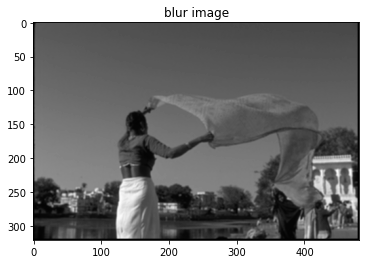

In [ ]:
L = convolution2d(Gray_I, G_kernel, Pd=1, S=1)
plt.title('blur image')
plt.imshow(L, cmap ='gray')

In [ ]:
def FeatureImage(L):
   p = 1
   q = 1
   M, N = L.shape
   
   Z = np.zeros((M,N), dtype=np.int32)
   for i in range(1,M-1):
        for j in range(1,N-1):
          if i==1 or j==1  or i==M-1 or j==N-1:
            L[i,j] = L[i,j]

          else:
             e1 = abs(L[i-1,j-1] - L[i,j])
             e2 = abs(L[i-1,j] - L[i,j])
             e3 = abs(L[i-1,j+1] - L[i,j])
             e4 = abs(L[i,j-1] - L[i,j])
             e5 = abs(L[i,j+1] - L[i,j])
             e6 = abs(L[i+1,j-1] - L[i,j])
             e7 = abs(L[i+1,j] - L[i,j])
             e8 = abs(L[i+1,j+1] - L[i,j])


             x1 = (e1**p)*(e2**q) + (e1**p)*(e3**q) + (e1**p)*(e4**q) + (e1**p)*(e5**q) + (e1**p)*(e6**q) + (e1**p)*(e7**q) + (e1**p)*(e8**q)
             x2 = (e2**p)*(e1**q) + (e2**p)*(e3**q) + (e2**p)*(e4**q) + (e2**p)*(e5**q) + (e2**p)*(e6**q) + (e2**p)*(e7**q) + (e2**p)*(e8**q)
             x3 = (e3**p)*(e1**q) + (e3**p)*(e2**q) + (e3**p)*(e4**q) + (e3**p)*(e5**q) + (e3**p)*(e6**q) + (e3**p)*(e7**q) + (e3**p)*(e8**q)
             x4 = (e4**p)*(e1**q) + (e4**p)*(e2**q) + (e4**p)*(e3**q) + (e4**p)*(e5**q) + (e4**p)*(e6**q) + (e4**p)*(e7**q) + (e4**p)*(e8**q)
             x5 = (e5**p)*(e1**q) + (e5**p)*(e2**q) + (e5**p)*(e3**q) + (e5**p)*(e4**q) + (e5**p)*(e6**q) + (e5**p)*(e7**q) + (e5**p)*(e8**q)
             x6 = (e6**p)*(e1**q) + (e6**p)*(e2**q) + (e6**p)*(e3**q) + (e6**p)*(e4**q) + (e6**p)*(e5**q) + (e6**p)*(e7**q) + (e6**p)*(e8**q)
             x7 = (e7**p)*(e1**q) + (e7**p)*(e2**q) + (e7**p)*(e3**q) + (e7**p)*(e4**q) + (e7**p)*(e5**q) + (e7**p)*(e6**q) + (e7**p)*(e8**q)
             x8 = (e8**p)*(e1**q) + (e8**p)*(e2**q) + (e8**p)*(e3**q) + (e8**p)*(e4**q) + (e8**p)*(e5**q) + (e8**p)*(e6**q) + (e8**p)*(e7**q)
  
             y = 1/(p+q)
            
             BM = ((1/56) * ((x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8)** y))
            
             Z[i, j] = BM

   return Z

In [ ]:
If = FeatureImage(L)

(321, 481)


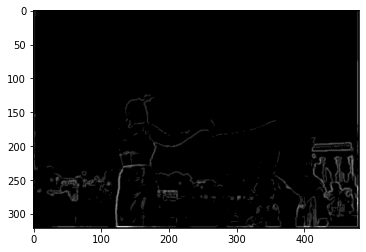

In [ ]:
plt.imshow(If,cmap='gray')
print(If.shape)

In [ ]:
def FinalFeatureImage(If):
  M, N = If.shape
  
  F = np.zeros((M,N), dtype=np.int32)
  for i in range(1,M-1):
    for j in range(1,N-1):
      F[i,j] = (If[i,j]) ** (0.2)
  
  return F    

In [ ]:
from scipy import ndimage

def ThetaCalculation(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    theta = np.arctan2(Iy, Ix)
    
    return theta

In [ ]:
theta = ThetaCalculation(L)

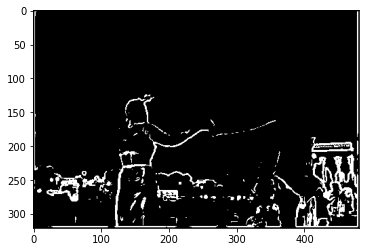

In [ ]:
If = FinalFeatureImage(If)
plt.imshow(I,cmap='gray')

In [ ]:
Img = If
D = theta
def non_max_suppression(Img, D):
    M, N = Img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = Img[i, j+1]
                    r = Img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = Img[i+1, j-1]
                    r = Img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = Img[i+1, j]
                    r = Img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = Img[i-1, j-1]
                    r = Img[i+1, j+1]

                if (Img[i,j] >= q) and (Img[i,j] >= r):
                    Z[i,j] = Img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

(321, 481)

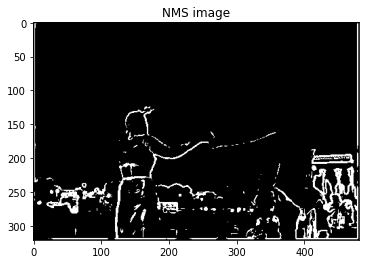

In [ ]:
NMS_Img = non_max_suppression(If, theta)
plt.title('NMS image')
plt.imshow(NMS_Img,cmap='gray')
NMS_Img.shape

In [ ]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    print('weak pixel is: ',weak)
    return (res, weak, strong)

weak pixel is:  25


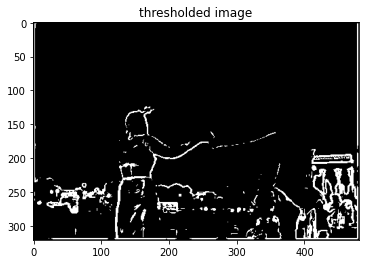

In [ ]:
res,weak,strong = threshold(NMS_Img, lowThresholdRatio=0.05, highThresholdRatio=0.09)
plt.title('thresholded image')
plt.imshow(res,cmap='gray')

In [ ]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        
                        img[i, j] = strong
                        
                    else:
                        img[i, j] = 0
                        
                except IndexError as e:
                    pass
    return img

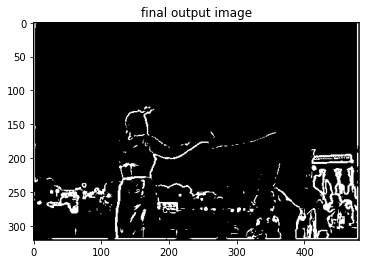

In [ ]:
Final = hysteresis(res, weak, strong=255)
plt.title('final output image')
plt.imshow(Final,cmap = 'gray')